# Description

It generates a figure with the agreement of the final consensus partitions with the ensemble using three scenarios:
* The real data (using PhenomeXcan TWAS results projected into the LV space).
* Two null scenarios where structure in data is destroyed to assess the significance of clustering results in the real data.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Settings

In [3]:
OUTPUT_FIGURES_DIR = Path(conf.MANUSCRIPT["FIGURES_DIR"], "clustering").resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/opt/manuscript/content/images/clustering')

# Load best partitions

In [4]:
scenarios_results = {}

## Runs on real data

In [5]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/opt/data/results/clustering/consensus_clustering')

In [6]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/opt/data/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [7]:
best_partitions = pd.read_pickle(input_file)

In [8]:
best_partitions.shape

(59, 4)

In [9]:
best_partitions.head()

,method,partition,ari_median,selected
k,,,,
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True
22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True
13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
12,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089894,True
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True


In [10]:
best_partitions["selected"].value_counts()

False    44
True     15
Name: selected, dtype: int64

In [11]:
# get threshold
best_parts_stats = best_partitions["ari_median"].describe()
display(best_parts_stats)

count    59.000000
mean      0.066246
std       0.018264
min       0.033275
25%       0.049785
50%       0.067316
75%       0.086079
max       0.090117
Name: ari_median, dtype: float64

In [12]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

0.08607907160043715

In [13]:
scenarios_results["Real data"] = (best_partitions, best_parts_stats, best_threshold)

## Runs on simulated null scenario 1

The input data for all cases are TWAS results: a matrix with genes x traits, and p-values/z-scores in cells. We call this matrix M.
For this Null #1 scenario, we shuffle genes in M, and then this shuffled matrix is projected into the LV space, where clustering is performed.
Here we read these results.

In [14]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "null_sims", "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering')

In [15]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering/best_partitions_by_k.pkl')

In [16]:
best_partitions = pd.read_pickle(input_file)

In [17]:
best_partitions.shape

(59, 4)

In [18]:
best_partitions.head()

,method,partition,ari_median,selected
k,,,,
6,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000946,True
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000759,True
3,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000726,True
7,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000703,True
8,scc_050,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000605,True


In [19]:
best_partitions["selected"].value_counts()

False    44
True     15
Name: selected, dtype: int64

In [20]:
# get threshold
best_parts_stats = best_partitions["ari_median"].describe()
display(best_parts_stats)

count    59.000000
mean      0.000468
std       0.000113
min       0.000251
25%       0.000420
50%       0.000462
75%       0.000495
max       0.000946
Name: ari_median, dtype: float64

In [21]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

0.0004953979853009125

In [22]:
scenarios_results["Null #1"] = (best_partitions, best_parts_stats, best_threshold)

## Runs on simulated null scenario 2

For this Null #2 scenario, we projected the original M matrix into the latent space, and then shuffle LVs in the projected matrix.
Here we read these results.

In [23]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "null_sims_lv_shuffle", "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/opt/data/results/clustering/null_sims_lv_shuffle/consensus_clustering')

In [24]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/opt/data/results/clustering/null_sims_lv_shuffle/consensus_clustering/best_partitions_by_k.pkl')

In [25]:
best_partitions = pd.read_pickle(input_file)

In [26]:
best_partitions.shape

(59, 4)

In [27]:
best_partitions.head()

,method,partition,ari_median,selected
k,,,,
7,scc_020,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.000719,True
14,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000644,True
5,scc_050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000601,True
36,scc_050,"[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2...",0.000589,True
33,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000578,True


In [28]:
best_partitions["selected"].value_counts()

False    44
True     15
Name: selected, dtype: int64

In [29]:
# get threshold
best_parts_stats = best_partitions["ari_median"].describe()
display(best_parts_stats)

count    5.900000e+01
mean     4.661551e-04
std      1.042585e-04
min     -3.045898e-07
25%      4.324421e-04
50%      4.828000e-04
75%      5.101938e-04
max      7.193555e-04
Name: ari_median, dtype: float64

In [30]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

0.0005101937973594319

In [31]:
scenarios_results["Null #2"] = (best_partitions, best_parts_stats, best_threshold)

# Plot of selected best partitions

In [32]:
real_threshold = scenarios_results["Real data"][2]
display(real_threshold)

0.08607907160043715

In [33]:
all_data = []
for k, v in scenarios_results.items():
    all_data.append(v[0].assign(scenario=k).reset_index())

In [34]:
plot_data = pd.concat(all_data, ignore_index=True)
display(plot_data.shape)
display(plot_data.head(5))
assert plot_data.shape[0] == 3 * 59

(177, 6)

,k,method,partition,ari_median,selected,scenario
0,14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True,Real data
1,22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True,Real data
2,13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True,Real data
3,12,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089894,True,Real data
4,11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True,Real data


In [35]:
_tmp = best_partitions.columns[
    ~best_partitions.columns.isin(["k", "method", "partition", "selected"])
]
assert _tmp.shape[0] == 1

_measure_col = _tmp[0]
display(_measure_col)

'ari_median'

In [36]:
_selected_measure = "ARI"
_selected_stat = "Median"

PosixPath('/opt/manuscript/content/images/clustering/selected_best_partitions_by_k.svg')

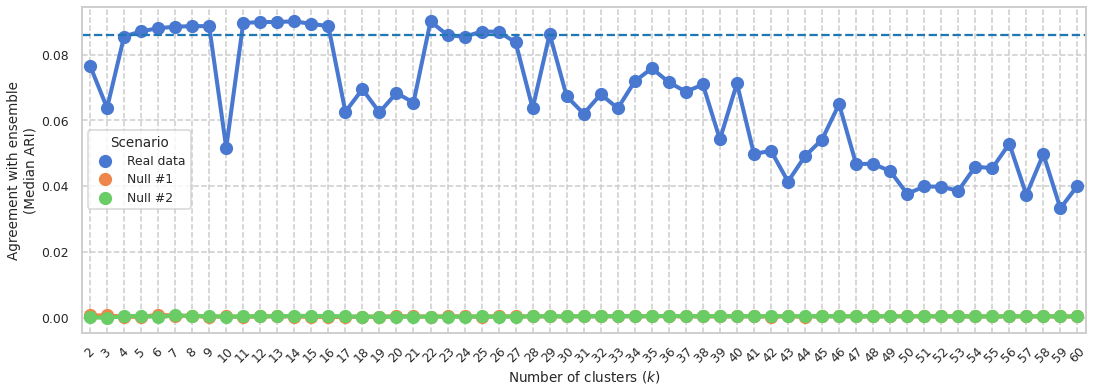

In [37]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(18, 6))
    ax = sns.pointplot(
        # data=plot_data, x="k", y=_measure_col, color=next(current_palette), hue="scenario",
        data=plot_data.rename(columns={"scenario": "Scenario"}),
        x="k",
        y=_measure_col,
        hue="Scenario",
    )
    ax.axhline(
        real_threshold,
        ls="--",
        # color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel(f"Agreement with ensemble\n({_selected_stat} {_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # plt.legend()
    plt.grid(True)
    #     plt.tight_layout()

    output_filepath = OUTPUT_FIGURES_DIR / "selected_best_partitions_by_k.svg"
    display(output_filepath)

    plt.savefig(
        output_filepath,
        #         dpi=600,
        bbox_inches="tight",
        facecolor="white",
    )